In [14]:
import warnings

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

from get_data import get_balanced_exoplanet_data, get_scaled_balanced_exoplanet_data

warnings.simplefilter("ignore")

In [15]:
x_train, x_test, y_train, y_test = get_balanced_exoplanet_data()
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = get_scaled_balanced_exoplanet_data()

## Try without scaling

0.945049504950495


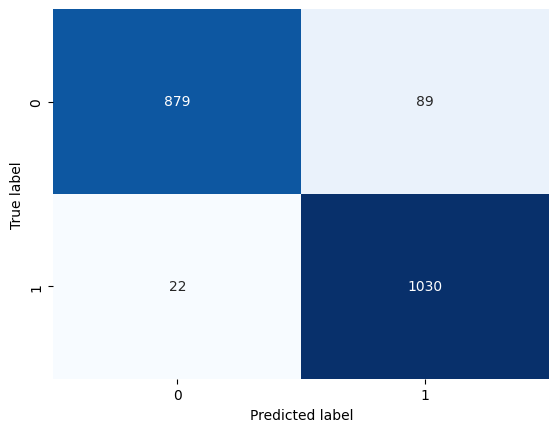

In [16]:
# Parameters
rng_seed = 2023
depth = 5  # max tree depth

model = DecisionTreeClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test, pred),
    annot=True,
    cmap="Blues",
    cbar=False,
    fmt=".0f",
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test, pred))

## Test if scaling improves performance

0.9475247524752475


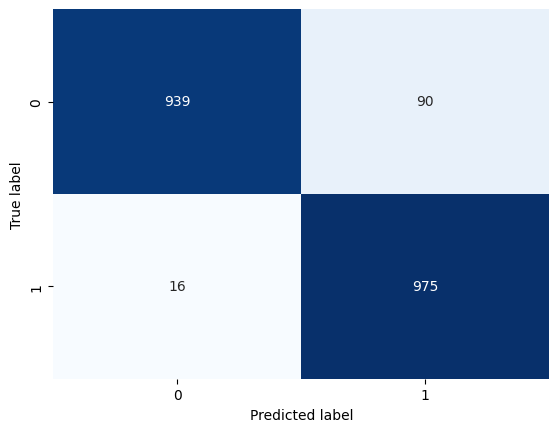

In [17]:
model = DecisionTreeClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
)
model.fit(x_train_scaled, y_train_scaled)
pred = model.predict(x_test_scaled)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test_scaled, pred),
    annot=True,
    cmap="Blues",
    cbar=False,
    fmt=".0f",
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test_scaled, pred))

#### Here scaling does not really improve performance

## Test other criterion

0.504950495049505
0.504950495049505


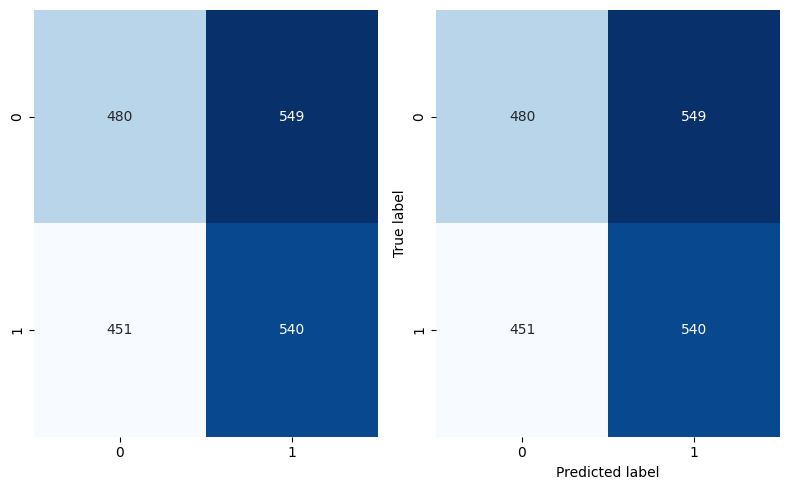

In [19]:
# Parameters
criterions = ["entropy", "log_loss"]

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

for i, criterion in enumerate(criterions):
    model = DecisionTreeClassifier(
        max_depth=depth,
        random_state=rng_seed,
        class_weight="balanced",
        criterion=criterion,
    )
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    # Confusion matrix
    sns.heatmap(
        confusion_matrix(y_test_scaled, pred),
        annot=True,
        cmap="Blues",
        cbar=False,
        fmt=".0f",
        ax=axs[i],
    )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    # Metrics
    print(accuracy_score(y_test_scaled, pred))

plt.tight_layout()
plt.show();

#### It seems like these other criterions are just guessing...

## Visualize tree

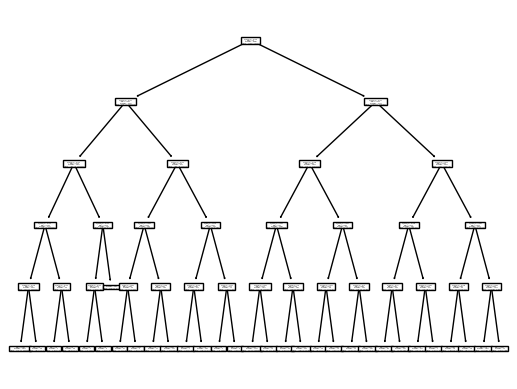

In [5]:
plot_tree(model);

## Plot precision as function of max tree depth

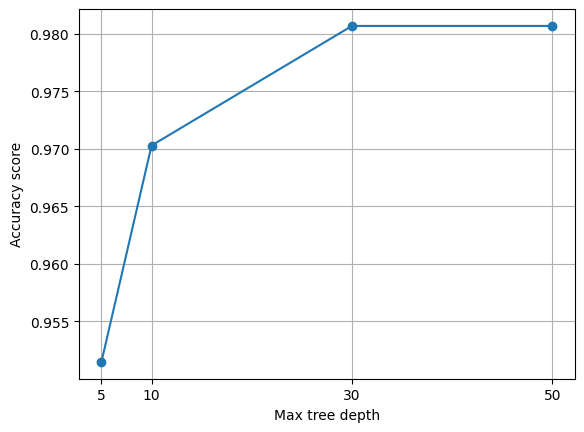

In [7]:
# Parameters
depths = [5, 10, 30, 50]
filename = "../results/figures/class_tree_asfuncof_depth.png"

accuracies = np.empty(len(depths))
models = list()
for i, depthi in enumerate(depths):
    modeli = DecisionTreeClassifier(
        max_depth=depthi, random_state=rng_seed, class_weight="balanced"
    )
    modeli.fit(x_train, y_train)
    predi = modeli.predict(x_test)
    models.append(modeli)
    accuracies[i] = accuracy_score(y_test, predi)

plt.plot(depths, accuracies, "-o")
plt.xlabel("Max tree depth")
plt.ylabel("Accuracy score")
plt.xticks(depths)
plt.grid(True)

if filename:
    plt.savefig(filename)
plt.show()